In [1]:
import pandas as pd

In [2]:
events = pd.read_pickle('data_filtered/events.pkl')
events

,user_id,track_id,album_id,timestamp
0,5090,12533056,8128141,2014-02-08 23:12:09
1,5090,36383760,8009856,2014-02-08 22:54:39
2,5090,34502741,1677788,2014-02-08 22:20:23
3,5090,33547637,5574231,2014-02-08 22:01:57
4,5090,44775825,13335902,2014-02-08 21:47:09
...,...,...,...,...
12059483,29622,40146671,20059465,2009-01-26 12:47:56
12059484,29622,6245708,6383777,2009-01-26 12:32:39
12059485,29622,41352353,11002160,2009-01-26 12:21:00
12059486,29622,36747225,13229312,2009-01-26 12:07:47


In [23]:
track_count = events.groupby('track_id').agg(['count', 'nunique']).reset_index()
track_count.columns = ["_".join(a) for a in track_count.columns.to_flat_index()]
track_count = track_count[['track_id_', 'timestamp_count', 'user_id_nunique']]
track_count.columns = ['track_id', 'count', 'unique users']
track_count = track_count.sort_values('count', ascending = False)

In [24]:
track_count

,track_id,count,unique users
1472557,47846265,6454,1
1164912,38214682,4717,37
690846,23391431,4013,1
822686,27546184,3499,84
599016,20329761,3217,54
...,...,...,...
726311,24458143,1,1
726312,24458158,1,1
726313,24458448,1,1
726316,24458517,1,1


в файле tracks не id артиста!!! и в файле артистов есть дубли в именах

In [5]:
tracks = pd.read_pickle('data_filtered/tracks.pkl')
tracks

,track_id,artist_name,track_name
0,154,Ghostface Killah,
1,172,Kina Grannis,
2,174,Kylie Minoise,
3,179,Mari! Mari,
4,212,Revlovers,
...,...,...,...
1541797,50812130,RIP SLYME,ﾗｳﾞぃ(ﾘｯﾌﾟｽﾗｲﾑとくるり)
1541798,50812435,Parken,�t Helvete Med Himlen
1541799,50812460,Tenkorr,��� ��� ���������� (�.�.�.)
1541800,50812501,Дельфин,�������


In [25]:
track_count.merge(tracks, on='track_id').head(30)

,track_id,count,unique users,artist_name,track_name
0,47846265,6454,1,Zona Ganjah,zona ganjah - fumando vamos a casa
1,38214682,4717,37,Evanescence,Sweet Sacrifice
2,23391431,4013,1,Larica dos Mulekes,Larica dos Mulekes - Lanche é Lanche
3,27546184,3499,84,Evanescence,My Immortal
4,20329761,3217,54,Evanescence,Imaginary
5,44856605,2844,38,Evanescence,Whisper
6,4841739,2616,34,Within Temptation,Angels
7,5993956,2548,10,Andrew Jackson Jihad,Bad Bad Things
8,17854759,2368,57,Evanescence,Haunted
9,7811494,2300,102,Evanescence,Bring Me to Life


nunique = 1 - странные юзеры, мб будут траблы с предсказанием

In [26]:
events[events['track_id']==5993956]['user_id'].unique()#не выброс, но странно

array([2351, 11809, 7397, 63676, 12356, 2428, 24095, 63063, 71979, 37179],
      dtype=object)

In [27]:
events[events['user_id']==2351]

,user_id,track_id,album_id,timestamp
1081307,2351,6404666,14895234,2014-03-19 16:13:10
1081308,2351,23746881,10322408,2014-03-19 15:58:43
1081309,2351,10485476,18599929,2014-03-19 15:22:51
1081310,2351,44578914,9625554,2014-03-19 02:00:42
1081311,2351,5535896,9625554,2014-03-19 01:37:08
...,...,...,...,...
1089282,2351,4900406,5238728,2013-02-07 13:11:15
1089283,2351,18064063,5238728,2013-02-07 12:59:54
1089284,2351,18327487,20189942,2013-02-07 12:49:01
1089285,2351,37230599,20189942,2013-02-07 12:37:47


In [28]:
events[events['user_id']==71979]

,user_id,track_id,album_id,timestamp
9476288,71979,19305523,19851633,2014-05-16 03:58:19
9476289,71979,38565868,5755538,2014-05-15 23:47:58
9476290,71979,46885691,23301657,2014-05-15 22:31:45
9476291,71979,38046618,11917321,2014-05-14 19:47:50
9476292,71979,21718493,14828037,2014-05-14 18:17:37
...,...,...,...,...
9493361,71979,15138588,17906461,2011-09-14 13:04:56
9493362,71979,17606305,17906461,2011-09-14 12:53:16
9493363,71979,12250269,19513933,2011-09-14 03:28:11
9493364,71979,6611791,5243789,2011-09-14 03:20:27


In [59]:
artists = pd.read_pickle('data_filtered/artists.pkl')

In [60]:
artists

,artist_id,artist_name
0,1252,Pogo
1,1255,The Prodigy
2,1289,13
3,1290,14
4,1295,19
...,...,...
171903,5158476,ﾍﾕﾊｫﾖ雹
171904,5158570,ﾒｻ･ﾎ栫･ﾈ･ｭ･・CV:稽ﾒｰﾕ賁ﾘ)
171905,5158575,ﾓﾃｳﾉ携
171906,5158617,ﾖﾜﾓ蠹・ﾐ・ﾂ


In [62]:
artist_names = artists.groupby('artist_name').count().reset_index()
artist_names[artist_names['artist_id']>1]

,artist_name,artist_id
1000,13,2
1044,14,2
1217,19,2
1453,22,2
2194,77,2
...,...,...
168634,Формула Любви,2
168650,Фристайл,2
168799,Чиж,2
168843,Чёрный Обелиск,2


In [64]:
events_tracks = events.merge(tracks, on='track_id')

In [66]:
artists_count = events_tracks.groupby('artist_name').count().reset_index()[['artist_name', 'timestamp']]
artists_count.columns = ['artist_name', 'listening_count']
artists_count.sort_values('listening_count', ascending=False).head(20)

,artist_name,listening_count
48132,Evanescence,84475
113092,Radiohead,44224
136541,The Beatles,37339
109320,Pink Floyd,35485
100667,Nightwish,35302
82842,Linkin Park,31726
92440,Metallica,31270
10886,Arctic Monkeys,29725
106146,Paramore,28133
34468,Daft Punk,26084


## Анализ жанров

In [29]:
micro_genre = pd.read_pickle('data_filtered/micro_genre.pkl')

In [30]:
micro_genre

,artist,track,i,micro_genre,weight
0,Gotye,Somebody That I Used to Know,36346257,pop,19
1,Gotye,Somebody That I Used to Know,36346257,indie pop,10
2,Gotye,Somebody That I Used to Know,36346257,rock,5
3,Gotye,Somebody That I Used to Know,36346257,singer-songwriter,4
4,Gotye,Somebody That I Used to Know,36346257,indie rock,4
...,...,...,...,...,...
2593456,Alan Parsons Project,Eye In The Sky,14456757,easy listening,4
2593457,Alan Parsons Project,Eye In The Sky,14456757,pop rock,2
2593458,Alan Parsons Project,Eye In The Sky,14456757,album rock,2
2593459,Alan Parsons Project,Eye In The Sky,14456757,yacht rock,2


In [32]:
genres = track_count.merge(micro_genre, left_on='track_id', right_on='i')

In [48]:
genres

,track_id,count,unique users,artist,track,i,micro_genre,weight
0,38214682,4717,37,Evanescence,Sweet Sacrifice,38214682,rock,100
1,38214682,4717,37,Evanescence,Sweet Sacrifice,38214682,gothic rock,88
2,38214682,4717,37,Evanescence,Sweet Sacrifice,38214682,metal,28
3,38214682,4717,37,Evanescence,Sweet Sacrifice,38214682,alternative rock,25
4,38214682,4717,37,Evanescence,Sweet Sacrifice,38214682,gothic metal,23
...,...,...,...,...,...,...,...,...
2593456,24460332,1,1,Psychostick,Lizard Sphere X,24460332,metalcore,100
2593457,24460608,1,1,Righteous Jams,Lizards,24460608,hardcore punk,100
2593458,24458158,1,1,Stwo,Liz (Arnold x Lil Texas Remix),24458158,electro,100
2593459,24458517,1,1,Shelagh McDonald,Liz's Song,24458517,singer-songwriter,100


In [44]:
top_weight_genres = genres[genres['weight']==100]
top_weight_genres = top_weight_genres.groupby('micro_genre').count()['track_id'].reset_index()
top_weight_genres.columns = ['micro_genre', 'count']

<AxesSubplot:>

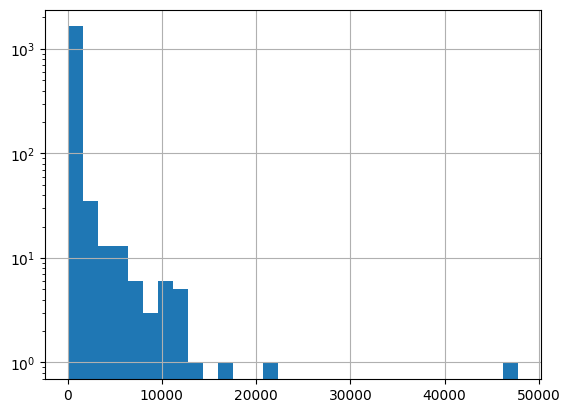

In [46]:
top_weight_genres['count'].hist(bins=30, log=True)

In [47]:
top_weight_genres.sort_values('count', ascending=False).head(20)

,micro_genre,count
1361,rock,47835
1234,pop,21124
886,jazz,17482
1484,soundtrack,13615
590,folk,12743
45,ambient,12716
1311,punk,12572
1034,metal,11486
798,indie rock,11239
153,black metal,11160


In [49]:
weight_sum_genres = genres.groupby('micro_genre').sum()['track_id'].reset_index()
weight_sum_genres.columns = ['micro_genre', 'weight_sum']

In [50]:
weight_sum_genres.sort_values('weight_sum', ascending=False).head(20)

,micro_genre,weight_sum
1928,rock,4389417092767
1770,pop,2415046786698
1475,metal,1811614999187
60,alternative rock,1591165070599
1144,indie rock,1196785278274
61,ambient,1135252883324
769,experimental,1127637150852
2060,singer-songwriter,1069768678116
1054,hard rock,1062984572690
467,classic rock,1058462580597


In [51]:
general_count_genres = genres.groupby('micro_genre').count()['track_id'].reset_index()
general_count_genres.columns = ['micro_genre', 'genres_count']

In [52]:
general_count_genres.sort_values('genres_count', ascending=False).head(20)

,micro_genre,genres_count
1928,rock,175580
1770,pop,96614
1475,metal,73216
60,alternative rock,63712
1144,indie rock,47714
61,ambient,45322
769,experimental,45214
2060,singer-songwriter,42915
1054,hard rock,42872
730,electronica,42407


Подумать как в модели учитывать жанры, думаю это может быть хорошим признаком

## Анализ тегов

In [53]:
tags = pd.read_pickle('data_filtered/tags.pkl')

In [54]:
tags

,artist,track,i,tag,weight
0,Gotye,Somebody That I Used to Know,36346257,indie,100
1,Gotye,Somebody That I Used to Know,36346257,alternative,79
2,Gotye,Somebody That I Used to Know,36346257,electronic,40
3,Gotye,Somebody That I Used to Know,36346257,australian,37
4,Gotye,Somebody That I Used to Know,36346257,love at first listen,37
...,...,...,...,...,...
14390107,Alan Parsons Project,Eye In The Sky,14456757,1980s,2
14390108,Alan Parsons Project,Eye In The Sky,14456757,rock ballads,2
14390109,Alan Parsons Project,Eye In The Sky,14456757,1980's,2
14390110,Alan Parsons Project,Eye In The Sky,14456757,Eric Woolfson,2


In [55]:
tags = track_count.merge(tags, left_on='track_id', right_on='i')

In [57]:
top_weight_tags = tags[tags['weight']==100]
top_weight_tags = top_weight_tags.groupby('tag').count()['track_id'].reset_index()
top_weight_tags.columns = ['tag', 'count']

In [58]:
top_weight_tags.sort_values('count', ascending=False).head(20)

,tag,count
105497,rock,47835
57975,electronic,29198
74404,indie,28241
99677,pop,21124
76701,jazz,17482
36776,alternative,16332
15251,Hip-Hop,15967
29090,Soundtrack,13615
62854,folk,12743
37109,ambient,12716


## Фичи из features

In [74]:
features = pd.read_pickle('data_filtered/features.pkl')

In [75]:
features

,artist,track,i,token_count,line_count,character_count,stop_word_count,hyphen_count,compression_ratio,entropy
0,Fischerspooner,Tone Poem,41750244,73,17,378,26,2,1.462633,4.003091
1,Bedouin Soundclash,Eloween Deowen,13614982,296,76,1350,131,16,3.026258,4.183733
2,The So So Glos,Blowout,7221218,28,7,113,4,1,1.057971,2.849235
3,Atmos,Twin Reaction,42476965,1106,14,5870,468,11,2.136853,5.398453
4,Charli XCX,!Franchesckaar!,1968,535,122,2443,180,1,3.936407,3.691611
...,...,...,...,...,...,...,...,...,...,...
278040,Jay Park,Touch The Sky (Feat. The Quiett),41887755,448,99,1838,102,0,2.160240,4.694272
278041,4minute,Dream Racer,12773940,460,77,1565,124,0,3.292398,4.074424
278042,Rain,Love Song (English Version),24908365,638,103,2937,211,0,2.846512,5.027780
278043,Esben and the Witch,Hexagons II (The Flight),18296918,148,21,650,63,0,2.292453,3.417732


Не очень понятно значение энтропии, скорее всего это какая-то [информационная энтропия](https://ru.wikipedia.org/wiki/Информационная_энтропия), [пример](https://www.researchgate.net/publication/231680363_On_the_Relationship_Between_Entropy_and_Meaning_in_Music_An_Exploration_with_Recurrent_Neural_Networks). compression_ratio вообще непонятно что такое, hyphen - дефисы?. Остальные признаки - классические признаки из nlp, характеризуют текст песни.  

## Матрица коллаборативной фильтрации

In [69]:
events_count = events.groupby(['user_id', 'track_id']).count().reset_index()

In [71]:
events_count = events_count[['user_id', 'track_id', 'timestamp']]
events_count.columns = ['user_id', 'track_id', 'listening_count']

In [73]:
events_count.pivot(index='track_id', columns='user_id', values='listening_count').fillna(0)

user_id,54,83,153,208,252,291,362,400,513,591,...,105685,106278,106967,107689,108136,110831,110880,112065,112696,114435
track_id,,,,,,,,,,,,,,,,,,,,,
154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50812130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50812435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50812460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Помимо матрицы коллаборативной фильтрации можно добавить в модель довольн много фичей: жанр (только придумать как его будем подбирать), фичи из файла features, теги, автор и альбом (их очень много, так что можно рекомендовать либо такой же альбом и исполнителя, либо обучить модель находить похожие альбомы и артистов), возраст и страну слушателя